In [1]:
import pandas as pd
import os

In [2]:
folder_path = "cambaz_sample/"
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

cust_best_sample = pd.read_csv(os.path.join(folder_path, 'cust_best_sample.csv'), encoding="utf-8", low_memory=False)
cust_sample = pd.read_csv(os.path.join(folder_path, 'cust_sample.csv'), encoding="utf-8", low_memory=False)

merged_cust = pd.merge(cust_best_sample, cust_sample, on='unique_customer_id', how='inner')

trx_sample = pd.read_csv(os.path.join(folder_path, 'trx_sample.csv'), encoding="utf-8", low_memory=False)

final_merged = pd.merge(merged_cust, trx_sample, left_on='cb_customer_id', right_on='cb_customer_id', how='inner')
final_merged.head()


,unique_customer_id,gender,date_of_birth,cb_customer_id,transaction_date,amount_after_discount,cb_branch_id,amount_before_discount,amount_discount
0,12540248219965049271,UNKNOWN,NaN,3508736758734884457,2016-04-28,0.625988,14,0.481092,0.372685
1,12540248219965049271,UNKNOWN,NaN,3508736758734884457,2016-05-02,-0.104068,14,-0.126027,-0.133340
2,298720182193033049,UNKNOWN,NaN,2652395064812696595,2016-05-29,-0.044746,59,0.274512,0.452217
3,4288086444089091293,UNKNOWN,NaN,2367801518374478424,2016-06-11,-0.291853,36,0.172174,0.440855
4,9890954173011064960,UNKNOWN,NaN,17618913796581577858,2016-09-08,0.498917,90,-0.123330,-0.488551


In [3]:
final_merged['amount_before_discount'].describe()

count    1.535320e+05
mean     2.313619e-15
std      1.000003e+00
min     -9.137788e+00
25%     -4.252846e-01
50%     -1.692841e-01
75%      2.299302e-01
max      1.566132e+01
Name: amount_before_discount, dtype: float64

In [4]:
from datetime import datetime
df = final_merged.copy()

date_columns = ["date_of_birth", "transaction_date"]

for date_column in date_columns:
    today = datetime.today().strftime('%Y-%m-%d')
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
    initial_count = len(df)
    df = df[df[date_column] <= pd.to_datetime(today)]
    removed_count = initial_count - len(df)
    print(date_column, ":", removed_count)


date_of_birth : 150773
transaction_date : 0


In [5]:
df = final_merged.copy()

column_names = ["gender", "cb_branch_id"]
for column_name in column_names:
    value_counts = df[column_name].value_counts()
    print(column_name, ":", value_counts)

gender : gender
UNKNOWN    148768
FEMALE       2585
MALE         2179
Name: count, dtype: int64
cb_branch_id : cb_branch_id
90    48837
71     2617
91     2407
46     2241
26     2085
      ...  
3       479
69      455
59      445
47      423
75      362
Name: count, Length: 94, dtype: int64


In [6]:
columns_to_denormalize = ['amount_after_discount', 'amount_before_discount', 'amount_discount']

mean_dict = df[columns_to_denormalize].mean()
std_dict = df[columns_to_denormalize].std()

for column in columns_to_denormalize:
    df[column] = (df[column] * std_dict[column]) + mean_dict[column]
print(df)

          unique_customer_id   gender date_of_birth        cb_customer_id  \
0       12540248219965049271  UNKNOWN           NaN   3508736758734884457   
1       12540248219965049271  UNKNOWN           NaN   3508736758734884457   
2         298720182193033049  UNKNOWN           NaN   2652395064812696595   
3        4288086444089091293  UNKNOWN           NaN   2367801518374478424   
4        9890954173011064960  UNKNOWN           NaN  17618913796581577858   
...                      ...      ...           ...                   ...   
153527    852927606245825616  UNKNOWN           NaN  16337551375405150602   
153528  14030300617352287697  UNKNOWN           NaN   1637004353644989361   
153529  13760720112954128876  UNKNOWN           NaN   8003988134276042386   
153530  16131736279850108118  UNKNOWN           NaN   6543826267873292337   
153531  16947898498863292180  UNKNOWN           NaN  11945926264685811054   

       transaction_date  amount_after_discount  cb_branch_id  \
0          

In [7]:
df = final_merged.copy()

df = df.replace('UNKNOWN', pd.NA)
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

if missing_values.empty:
    print("No missing values found in the dataset.")
else:
    print(f"{missing_values}")
    df = df.dropna(axis=1, how='any')

gender           148768
date_of_birth    150230
dtype: int64


In [25]:
import pandas as pd

def denormalize_columns(df, columns):
    df_original = df.copy()

    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        df_original[col] = (df[col] * std) + mean

    return df_original

# Kullanım:
standart_kolonlar = ["amount_after_discount", "amount_before_discount", "amount_discount"]
df = denormalize_columns(df, standart_kolonlar)
print(df)


          unique_customer_id        cb_customer_id transaction_date  \
0       12540248219965049271   3508736758734884457       2016-04-28   
1       12540248219965049271   3508736758734884457       2016-05-02   
2         298720182193033049   2652395064812696595       2016-05-29   
3        4288086444089091293   2367801518374478424       2016-06-11   
4        9890954173011064960  17618913796581577858       2016-09-08   
...                      ...                   ...              ...   
153527    852927606245825616  16337551375405150602       2016-04-30   
153528  14030300617352287697   1637004353644989361       2016-06-09   
153529  13760720112954128876   8003988134276042386       2016-06-01   
153530  16131736279850108118   6543826267873292337       2016-04-22   
153531  16947898498863292180  11945926264685811054       2016-07-03   

        amount_after_discount  cb_branch_id  amount_before_discount  \
0                    0.627030            14                0.481893   
1    

In [9]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month
df['day_of_week'] = df['transaction_date'].dt.dayofweek
df['week_of_year'] = df['transaction_date'].dt.isocalendar().week
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
for column in df.columns:
    print(column, ":", df[column].nunique())
df = df.drop("year", axis = 1)
df.head()


unique_customer_id : 133074
cb_customer_id : 133074
transaction_date : 151
amount_after_discount : 19170
cb_branch_id : 94
amount_before_discount : 40178
amount_discount : 16328
year : 1
month : 6
day_of_week : 7
week_of_year : 22
is_weekend : 2


,unique_customer_id,cb_customer_id,transaction_date,amount_after_discount,cb_branch_id,amount_before_discount,amount_discount,month,day_of_week,week_of_year,is_weekend
0,12540248219965049271,3508736758734884457,2016-04-28,0.625990,14,0.481093,0.372686,4,3,17,0
1,12540248219965049271,3508736758734884457,2016-05-02,-0.104069,14,-0.126028,-0.133341,5,0,18,0
2,298720182193033049,2652395064812696595,2016-05-29,-0.044746,59,0.274513,0.452218,5,6,21,1
3,4288086444089091293,2367801518374478424,2016-06-11,-0.291854,36,0.172175,0.440856,6,5,23,1
4,9890954173011064960,17618913796581577858,2016-09-08,0.498919,90,-0.123331,-0.488552,9,3,36,0


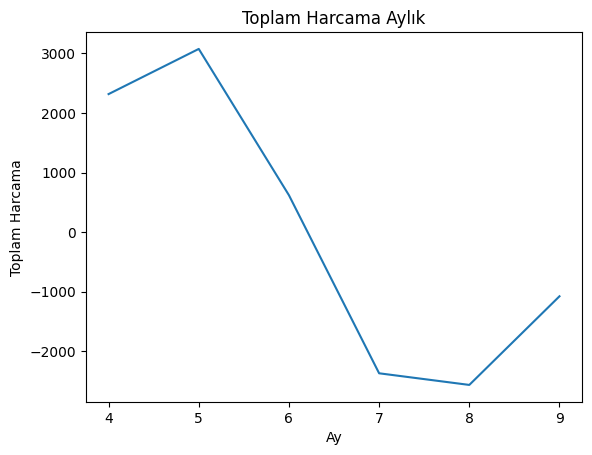

In [10]:
import matplotlib.pyplot as plt

df_grouped = df.groupby('month')['amount_after_discount'].sum()
df_grouped.plot(kind='line', title='Toplam Harcama Aylık')
plt.xlabel('Ay')
plt.ylabel('Toplam Harcama')
plt.show()


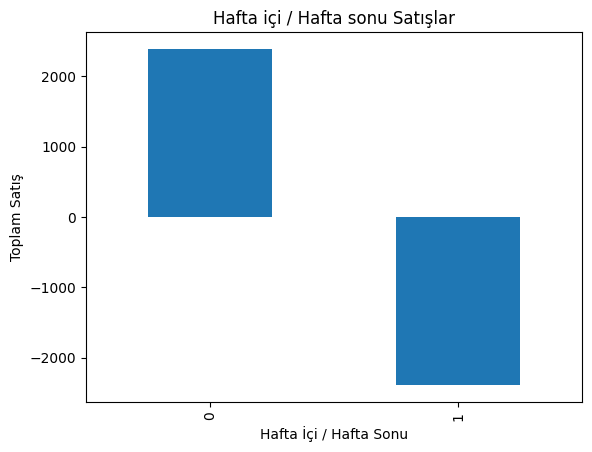

In [11]:
df_grouped_weekend = df.groupby('is_weekend')['amount_after_discount'].sum()
df_grouped_weekend.plot(kind='bar', title='Hafta içi / Hafta sonu Satışlar')
plt.xlabel('Hafta İçi / Hafta Sonu')
plt.ylabel('Toplam Satış')
plt.show()


In [12]:
customer_features = df.groupby('cb_customer_id').agg(
    total_transactions=('transaction_date', 'count'),
    total_spent=('amount_after_discount', 'sum'),
    avg_spent=('amount_after_discount', 'mean'),
    max_spent=('amount_after_discount', 'max'),
    min_spent=('amount_after_discount', 'min'),
    total_discount=('amount_discount', 'sum'),
    first_transaction=('transaction_date', 'min'),
    last_transaction=('transaction_date', 'max'),
).reset_index()

today = datetime.today()

df['transaction_date'] = pd.to_datetime(df['transaction_date'])
customer_features['recency'] = (today - customer_features['last_transaction']).dt.days
customer_features = customer_features.sort_values(by='total_transactions', ascending=False)
customer_features


,cb_customer_id,total_transactions,total_spent,avg_spent,max_spent,min_spent,total_discount,first_transaction,last_transaction,recency
19465,2720852094252288832,68,-2.355929,-0.034646,3.270083,-0.496567,-33.221569,2016-05-22,2016-09-14,3069
7609,1051088297304856431,61,0.100708,0.001651,1.947178,-0.459510,-26.276124,2016-04-23,2016-09-14,3069
64200,8927417458717481851,59,-7.369864,-0.124913,0.908402,-0.496567,-28.824596,2016-05-23,2016-09-15,3068
52121,7249537811432129589,38,-5.340960,-0.140552,1.153775,-1.150185,-17.575641,2016-04-23,2016-09-16,3067
73603,10213807435026438240,36,-30.006336,-0.833509,5.070371,-6.289397,-24.035988,2016-04-18,2016-06-13,3162
...,...,...,...,...,...,...,...,...,...,...
13,1460211215168106,1,-0.344772,-0.344772,-0.344772,-0.344772,0.089769,2016-06-14,2016-06-14,3161
14,1521606061946235,1,-0.266234,-0.266234,-0.266234,-0.266234,-0.415270,2016-09-07,2016-09-07,3076
15,1588149747165806,1,-0.054335,-0.054335,-0.054335,-0.054335,-0.262444,2016-04-20,2016-04-20,3216
16,1685324822910733,1,0.361230,0.361230,0.361230,0.361230,0.406771,2016-05-27,2016-05-27,3179


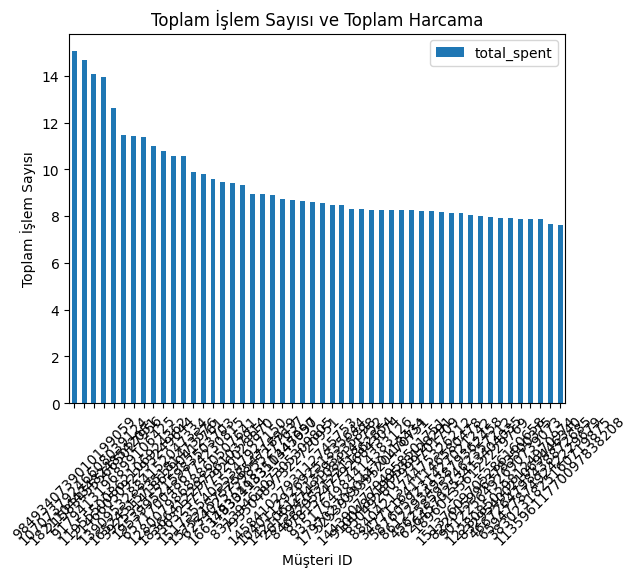

In [13]:
import matplotlib.pyplot as plt

customer_features_sorted = customer_features.sort_values(by="total_spent", ascending=False).head(50)

customer_features_sorted.plot(kind='bar', x="cb_customer_id", y="total_spent", title='Toplam İşlem Sayısı ve Toplam Harcama')
plt.xlabel('Müşteri ID')
plt.ylabel('Toplam İşlem Sayısı')
plt.xticks(rotation=45)
plt.show()


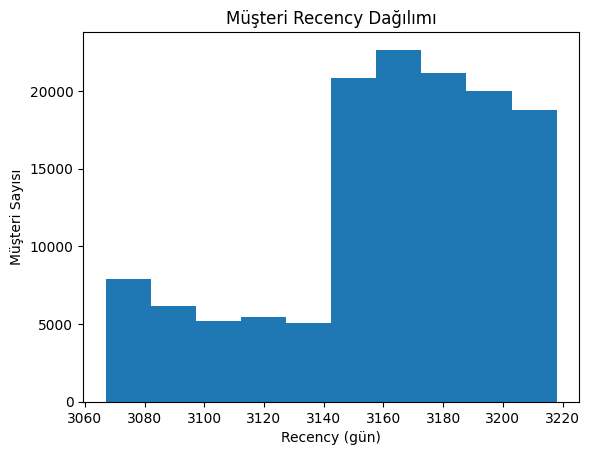

In [14]:
customer_features['recency'].plot(kind='hist', title='Müşteri Recency Dağılımı')
plt.xlabel('Recency (gün)')
plt.ylabel('Müşteri Sayısı')
plt.show()


In [15]:
df['discount_ratio'] = df['amount_discount'] / df['amount_before_discount']
df['final_price_ratio'] = df['amount_after_discount'] / df['amount_before_discount']
df['absolute_discount'] = df['amount_before_discount'] - df['amount_after_discount']
df

,unique_customer_id,cb_customer_id,transaction_date,amount_after_discount,cb_branch_id,amount_before_discount,amount_discount,month,day_of_week,week_of_year,is_weekend,discount_ratio,final_price_ratio,absolute_discount
0,12540248219965049271,3508736758734884457,2016-04-28,0.625990,14,0.481093,0.372686,4,3,17,0,0.774665,1.301182,-0.144897
1,12540248219965049271,3508736758734884457,2016-05-02,-0.104069,14,-0.126028,-0.133341,5,0,18,0,1.058026,0.825761,-0.021959
2,298720182193033049,2652395064812696595,2016-05-29,-0.044746,59,0.274513,0.452218,5,6,21,1,1.647349,-0.163002,0.319259
3,4288086444089091293,2367801518374478424,2016-06-11,-0.291854,36,0.172175,0.440856,6,5,23,1,2.560513,-1.695102,0.464029
4,9890954173011064960,17618913796581577858,2016-09-08,0.498919,90,-0.123331,-0.488552,9,3,36,0,3.961324,-4.045374,-0.622249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153527,852927606245825616,16337551375405150602,2016-04-30,0.096489,16,0.058360,0.032960,4,5,17,1,0.564777,1.653332,-0.038128
153528,14030300617352287697,1637004353644989361,2016-06-09,1.683295,36,1.431418,1.215701,6,3,23,0,0.849298,1.175963,-0.251877
153529,13760720112954128876,8003988134276042386,2016-06-01,-2.637561,68,-2.245395,-1.908764,6,2,22,0,0.850079,1.174653,0.392166
153530,16131736279850108118,6543826267873292337,2016-04-22,-0.397728,52,-0.438757,-0.443106,4,4,16,0,1.009911,0.906488,-0.041029


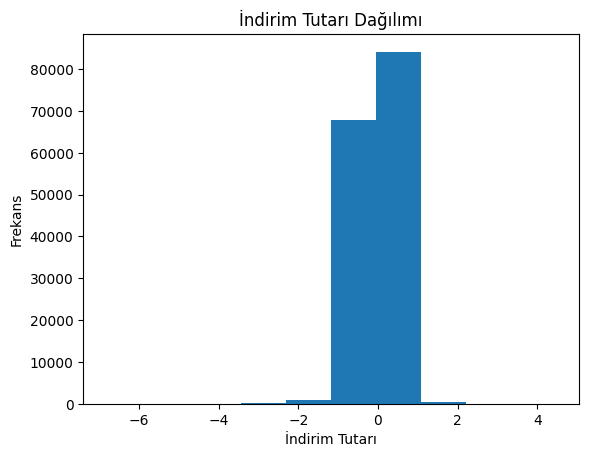

In [16]:
df['absolute_discount'].plot(kind='hist', title='İndirim Tutarı Dağılımı')
plt.xlabel('İndirim Tutarı')
plt.ylabel('Frekans')
plt.show()


In [17]:
branch_features = df.groupby('cb_branch_id').agg(
    branch_total_sales=('amount_after_discount', 'sum'),
    branch_avg_sales=('amount_after_discount', 'mean'),
    branch_total_discount=('amount_discount', 'sum'),
    branch_transaction_count=('transaction_date', 'count'),
).reset_index()
branch_features

,cb_branch_id,branch_total_sales,branch_avg_sales,branch_total_discount,branch_transaction_count
0,0,-76.250268,-0.087947,46.489689,867
1,1,5.882316,0.005801,186.493492,1014
2,2,81.924625,0.077142,256.038099,1062
3,3,-3.431429,-0.007164,66.276224,479
4,4,92.110698,0.116744,211.506242,789
...,...,...,...,...,...
89,89,158.730759,0.148903,228.022481,1066
90,90,-9786.583524,-0.200393,-22698.412326,48837
91,91,165.205789,0.068636,476.755812,2407
92,92,15.659163,0.020496,105.096515,764


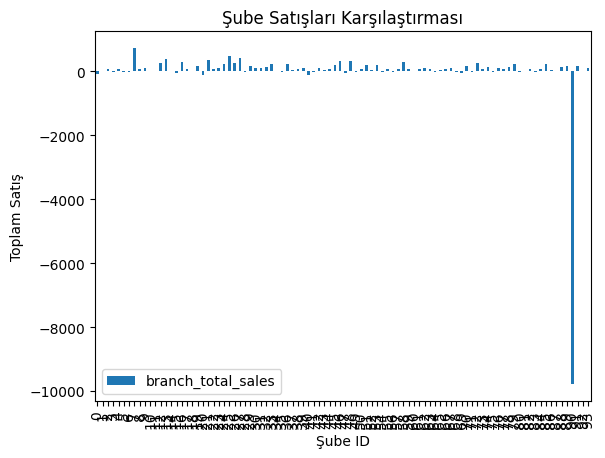

In [18]:
branch_features.plot(kind='bar', x='cb_branch_id', y='branch_total_sales', title='Şube Satışları Karşılaştırması')
plt.xlabel('Şube ID')
plt.ylabel('Toplam Satış')
plt.show()


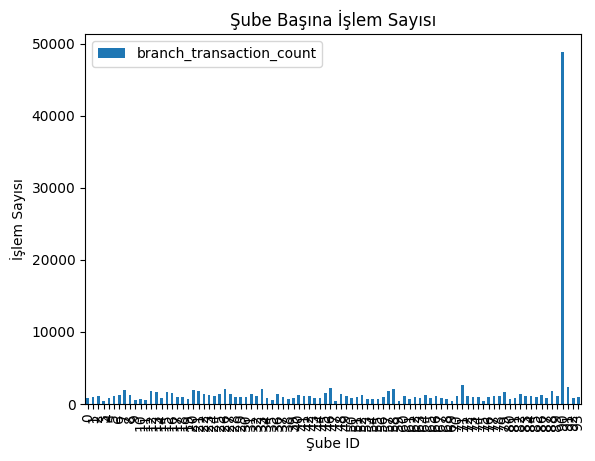

In [19]:
branch_features.plot(kind='bar', x='cb_branch_id', y='branch_transaction_count', title='Şube Başına İşlem Sayısı')
plt.xlabel('Şube ID')
plt.ylabel('İşlem Sayısı')
plt.show()


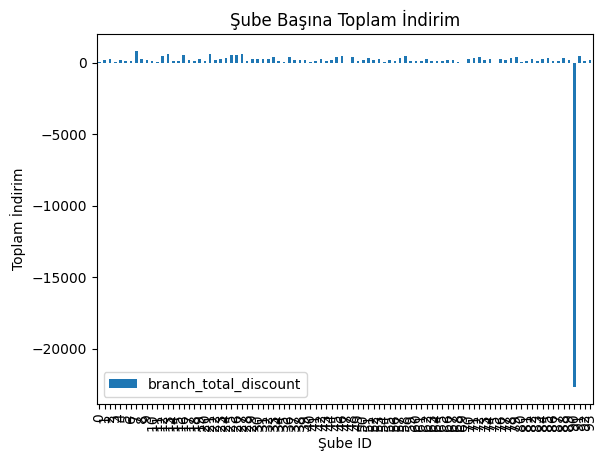

In [20]:
branch_features.plot(kind='bar', x='cb_branch_id', y='branch_total_discount', title='Şube Başına Toplam İndirim')
plt.xlabel('Şube ID')
plt.ylabel('Toplam İndirim')
plt.show()


In [2]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"


2
3
4
5
6
7
8
9


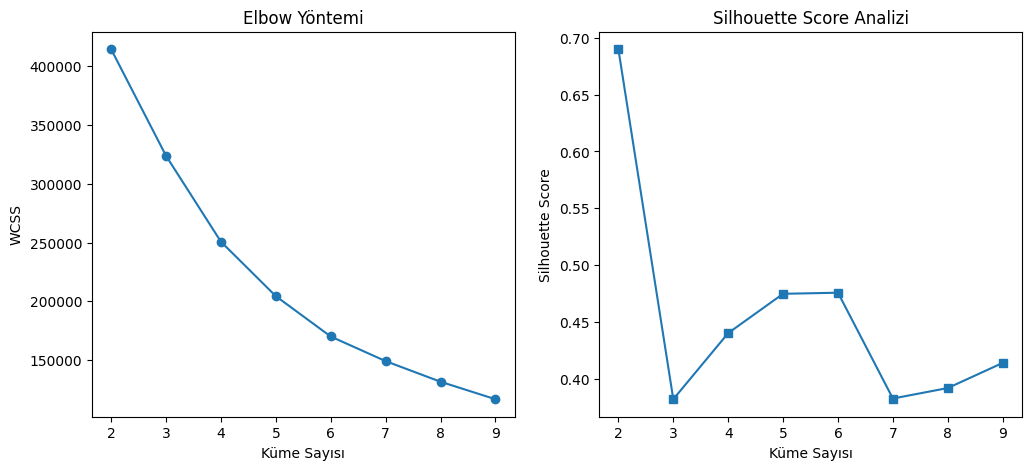

cluster
0    81001
2    25081
3    12898
1    12510
4     1584
Name: count, dtype: int64


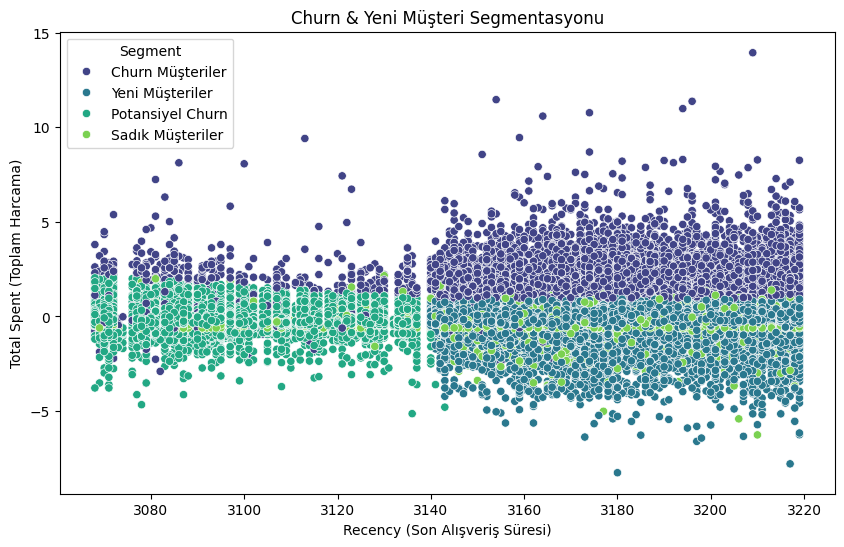

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from middleware import get_data

_, df, _ = get_data()
df = df.drop(columns=['cb_customer_id', 'first_transaction', 'last_transaction', 'total_spent'])


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

wcss = []
silhouette_scores = []

for k in range(2, 10):
    print(k)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel('Küme Sayısı')
plt.ylabel('WCSS')
plt.title('Elbow Yöntemi')

plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores, marker='s')
plt.xlabel('Küme Sayısı')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analizi')

plt.show()

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(df_scaled)

print(df["cluster"].value_counts())

def label_clusters(row):
    if row["cluster"] == 0:
        return "Yeni Müşteriler"
    elif row["cluster"] == 1:
        return "Sadık Müşteriler"
    elif row["cluster"] == 2:
        return "Potansiyel Churn"
    else:
        return "Churn Müşteriler"

df["Segment"] = df.apply(label_clusters, axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["recency"], y=df["avg_spent"], hue=df["Segment"], palette="viridis")
plt.xlabel("Recency (Son Alışveriş Süresi)")
plt.ylabel("Total Spent (Toplam Harcama)")
plt.title("Churn & Yeni Müşteri Segmentasyonu")
plt.legend(title="Segment")
plt.show()

In [ ]:
from middleware import get_data
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
scaler = StandardScaler()

_, data, _ = get_data()
df = data.drop(columns=['cb_customer_id', 'first_transaction', 'last_transaction', 'total_spent'])
df_scaled = scaler.fit_transform(df)

optimal_k = 5 
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(df_scaled)


def label_clusters(row):
    if row["cluster"] == 0:
        return "Yeni Müşteriler"
    elif row["cluster"] == 1:
        return "Sadık Müşteriler"
    elif row["cluster"] == 2:
        return "Potansiyel Churn"
    elif row["cluster"] == 3:
        return "Churn Müşteriler"
    else:
        return "Potansiyel Müşteriler"

df["Segment"] = df.apply(label_clusters, axis=1)

features = df.drop(columns=['cluster', 'Segment']).columns  

feature_importance = pd.DataFrame(kmeans.cluster_centers_, columns=features)

feature_importance_mean = feature_importance.mean(axis=0).sort_values(ascending=False)

print(feature_importance_mean)

life_time             1.554829
total_transactions    0.862584
avg_spent             0.254348
recency              -0.331295
dtype: float64
